In [4]:
import csv
import numpy as np
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

In [5]:
# Replace 'your_file.csv' with the actual path to your CSV file
csv_file_path = 'Q1 - Eye_data.csv'

# Create a dictionary to store the values
data_list = []

# Read the CSV file
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    # Iterate through each row in the CSV file
    for i,row in enumerate(csv_reader):
        row = [float(x) for x in row]
        data_list.append(row)

FileNotFoundError: [Errno 2] No such file or directory: 'Q1 - Eye_data.csv'

In [3]:
data = np.array(data_list)

NameError: name 'np' is not defined

In [109]:
# set(data[:,6])

In [108]:
data_trial_1 = data[np.where(data[:,1] == 1.0)]
for i in range(24):
    participant = data_trial_1[np.where(data_trial_1[:,0] == i+1.0)]
    len_participant = len(participant)
    print("Participant: ", i+1, " has ", len_participant, "number of data")
    for i in range(117):
        each_frame = participant[np.where(participant[:,6] == i+1.0)]
        print("for frame ", i+1, " has ", len(each_frame), "number of data")

Participant:  1  has  11675 number of data
for frame  1  has  100 number of data
for frame  2  has  100 number of data
for frame  3  has  100 number of data
for frame  4  has  100 number of data
for frame  5  has  100 number of data
for frame  6  has  100 number of data
for frame  7  has  100 number of data
for frame  8  has  100 number of data
for frame  9  has  100 number of data
for frame  10  has  100 number of data
for frame  11  has  100 number of data
for frame  12  has  100 number of data
for frame  13  has  100 number of data
for frame  14  has  100 number of data
for frame  15  has  100 number of data
for frame  16  has  100 number of data
for frame  17  has  100 number of data
for frame  18  has  100 number of data
for frame  19  has  100 number of data
for frame  20  has  100 number of data
for frame  21  has  100 number of data
for frame  22  has  100 number of data
for frame  23  has  100 number of data
for frame  24  has  100 number of data
for frame  25  has  100 number

For participant 1 and trial 1 and frame 1:
Calculate the average for x coordinates and y coordinates

In [2]:
data_1_1_1 = data[np.where((data[:,0] == 1.0)&(data[:,1]==2.0))]

for i in range(data_1_1_1.shape[0]):
    data_1_1_1[i,2] = np.mean(data_1_1_1[i,2:4])
    data_1_1_1[i,4] = np.mean(data_1_1_1[i,4:5])

NameError: name 'data' is not defined

In [95]:
len(data_1_1_1)

11677

In [91]:
y_max_value = np.max(data_1_1_1[:, 4])
y_min_value = np.min(data_1_1_1[:, 4])
x_max_value = np.max(data_1_1_1[:, 2])
x_min_value = np.min(data_1_1_1[:, 2])

NameError: name 'data_1_1_1' is not defined

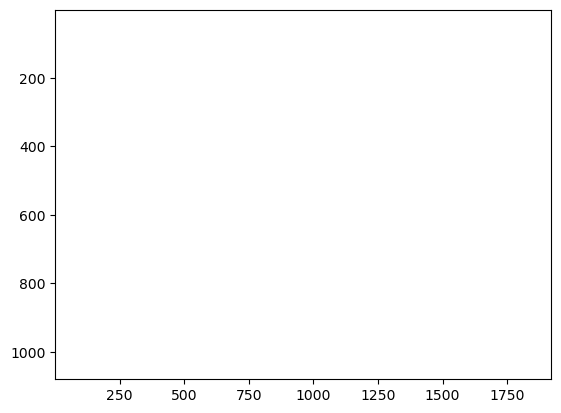

In [1]:
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

# Create a Tkinter window
root = Tk()
root.title("Marker Drawer")

# Create a Frame to hold the matplotlib plot
frame = Frame(root)
frame.pack()

# Create a matplotlib figure and axis
fig, ax = plt.subplots()

ax.set_xlim([1, 1920])
ax.set_ylim([1080, 1])

# Function to update the marker position based on the slider value
def update_marker(val):
    index = int(val)
    ax.clear()
    ax.set_xlim([1, 1920])
    ax.set_ylim([1080, 1])
    # Draw a marker on the canvas based on the x and y coordinates from the array
    x, y = data_1_1_1[index,2], data_1_1_1[index,4]
    ax.plot(x, y, marker='o', color='red', markersize=8)
    timeslot = data_1_1_1[index,6]*0.05
    x_,y_,timeslot_ = "{:.2f}".format(x),"{:.2f}".format(y),"{:.2f}".format(timeslot)
    value_label.config(text=f"Marker position: ({x_}, {y_}), video frame : {data_1_1_1[index,6]}, time {timeslot_} to {timeslot_+0.05}")
    fig.canvas.draw_idle()

# Create a slider
slider = Scale(root, from_=0, to=len(data_1_1_1) - 1, orient=HORIZONTAL, command=update_marker, length=300)
slider.pack()

# Create a label for additional information
value_label = Label(root, text="Marker position: (0, 0)")
value_label.pack()

# Show the initial plot
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas.draw()
canvas.get_tk_widget().pack(side='top', fill='both', expand=1)

# Run the Tkinter event loop
root.mainloop()
